<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (dez) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (trinta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>

In [1]:
# (opcional) Instalar bibliotecas
!pip install yfinance
!pip install investpy
!pip install tqdm
!pip install matplotlib
!pip install seaborn
!pip install ipywidgets
!pip install sklearn

You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Murilo\Documents\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
#Importando Modulos
import pandas as pd
import investpy
import yfinance as yf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import math
#plt.style.use('dark_background')

#### 1. Colete os preços e volumes de um conjunto de ativos durante o período de 10 (dez) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (trinta) ativos mais líquidos;

In [3]:
indexes = ['UTIL', 'ICON', 'SMLL', 'INDX', 'IBOV', 'IFNC']

data = []
for index in indexes:
    data.append(pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=' + index + '&idioma=pt-br'))
index_df = pd.DataFrame(data)
index_df

,0
0,Código ...
1,Código ...
2,Código ...
3,Código ...
4,Código ...
5,Código ...


In [4]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=10*365)
print(todayB,yesterdayB)

2022-08-01 2012-08-03


In [5]:
flag = 0
data = []
temp_selected = []
final_selected = []
for index in index_df[0]:
    for code in index['Código']:
        for x in final_selected:
            if (code == x[0]):
                flag = 1
                break
        if (flag):
            flag = 0
            continue
        temp_df = yf.download(code + '.SA', start=str(yesterdayB), end=str(todayB))
        if (not (isinstance((temp_df['Volume'].mean()), float))) or (math.isnan(temp_df['Volume'].mean())):
            continue
        if(len(temp_selected) == 0):
            temp_selected.append([code, temp_df])
        for pos in range(len(temp_selected)):
            if (temp_selected[pos][1]['Volume'].mean() < temp_df['Volume'].mean()):
                if (len(temp_selected) == 7):
                    temp_selected.pop()
                temp_selected.insert(pos, [code, temp_df])
                break
    final_selected.extend(temp_selected)
    temp_selected.clear()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CESP6.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

In [6]:
# Criação da output que será usado nas etapas 3 e 4

appended_data = []

for x in final_selected:
    data = pd.DataFrame(x[1])
    data['Code'] = x[0]
    appended_data.append(data)

appended_data = pd.concat(appended_data)
appended_data.to_csv('dados_ativos_escolhidos.csv', sep=';')

df = pd.read_csv('dados_ativos_escolhidos.csv', sep=';')
start_date = '2012-07-16'
end_date = '2015-07-16'

Symbols = df['Code'].unique()

output = None
sym=[]

for sy in Symbols:
    try:
        if output is None:
            output = df.loc[df['Code']==sy][['Date','Adj Close']].copy()
            output.set_index('Date', inplace=True)
            sym.append(sy)
        else:
            temp = df.loc[df['Code']==sy][['Date','Adj Close']].copy()
            temp.set_index('Date', inplace=True)
            output=pd.concat([output,temp],axis=1)
            sym.append(sy)
    except:
        print("Erro "+sy)


output.columns=sym
output.head(10) # Tabela preparada para as etapas 3 e 4

,CMIG4,CPLE6,EQTL3,ELET3,NEOE3,ENEV3,SAPR4,MGLU3,COGN3,ABEV3,...,ITSA4,VALE3,PETR3,BBAS3,BIDI4,BPAC11,BBSE3,BBDC3,BIDI11,SANB11
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-03,6.739985,2.049059,2.486030,8.356479,NaN,157.150131,1.281751,0.299976,1.473763,8.873693,...,3.371011,21.849388,12.623190,12.197204,NaN,NaN,NaN,6.335483,NaN,8.328938
2012-08-06,6.800001,2.112137,2.486030,8.477921,NaN,156.639450,1.290064,0.314354,1.473763,9.009608,...,3.429847,22.083698,12.641509,12.571768,NaN,NaN,NaN,6.538544,NaN,8.428215
2012-08-07,6.775998,2.114526,2.486030,8.477921,NaN,156.453751,1.296713,0.305332,1.473763,8.901718,...,3.429847,22.048552,12.824720,12.424047,NaN,NaN,NaN,6.531377,NaN,8.308038
2012-08-08,6.866899,2.114526,2.486030,8.477921,NaN,160.353485,1.291726,0.305332,1.473763,8.897511,...,3.429847,22.218426,13.520920,12.598145,NaN,NaN,NaN,6.593488,NaN,8.433441
2012-08-09,6.864703,2.117872,2.601276,8.819121,NaN,157.753662,1.281751,0.303923,1.473763,8.866686,...,3.488684,22.435160,13.447634,12.339641,NaN,NaN,NaN,6.569597,NaN,8.365515
2012-08-10,6.861751,2.117872,2.657254,8.790205,NaN,161.885529,1.363211,0.303923,1.473763,8.765803,...,3.488684,22.599182,13.441527,12.756415,NaN,NaN,NaN,6.689046,NaN,8.365515
2012-08-13,6.868613,2.084899,2.657254,8.795988,NaN,159.703537,1.426385,0.296029,1.473763,8.784017,...,3.502528,22.616749,13.404886,12.360743,NaN,NaN,NaN,6.657990,NaN,8.166960
2012-08-14,6.824023,2.078687,2.716523,8.784422,NaN,161.096298,1.428047,0.314636,1.621139,8.849872,...,3.457535,21.702940,13.325494,11.854293,NaN,NaN,NaN,6.612597,NaN,8.109481
2012-08-15,6.825738,1.971169,2.678657,9.044659,NaN,167.363739,1.462958,0.309843,1.621139,8.810642,...,3.485223,21.263615,13.435417,12.213032,NaN,NaN,NaN,6.610207,NaN,8.360289


<AxesSubplot:ylabel='Date'>

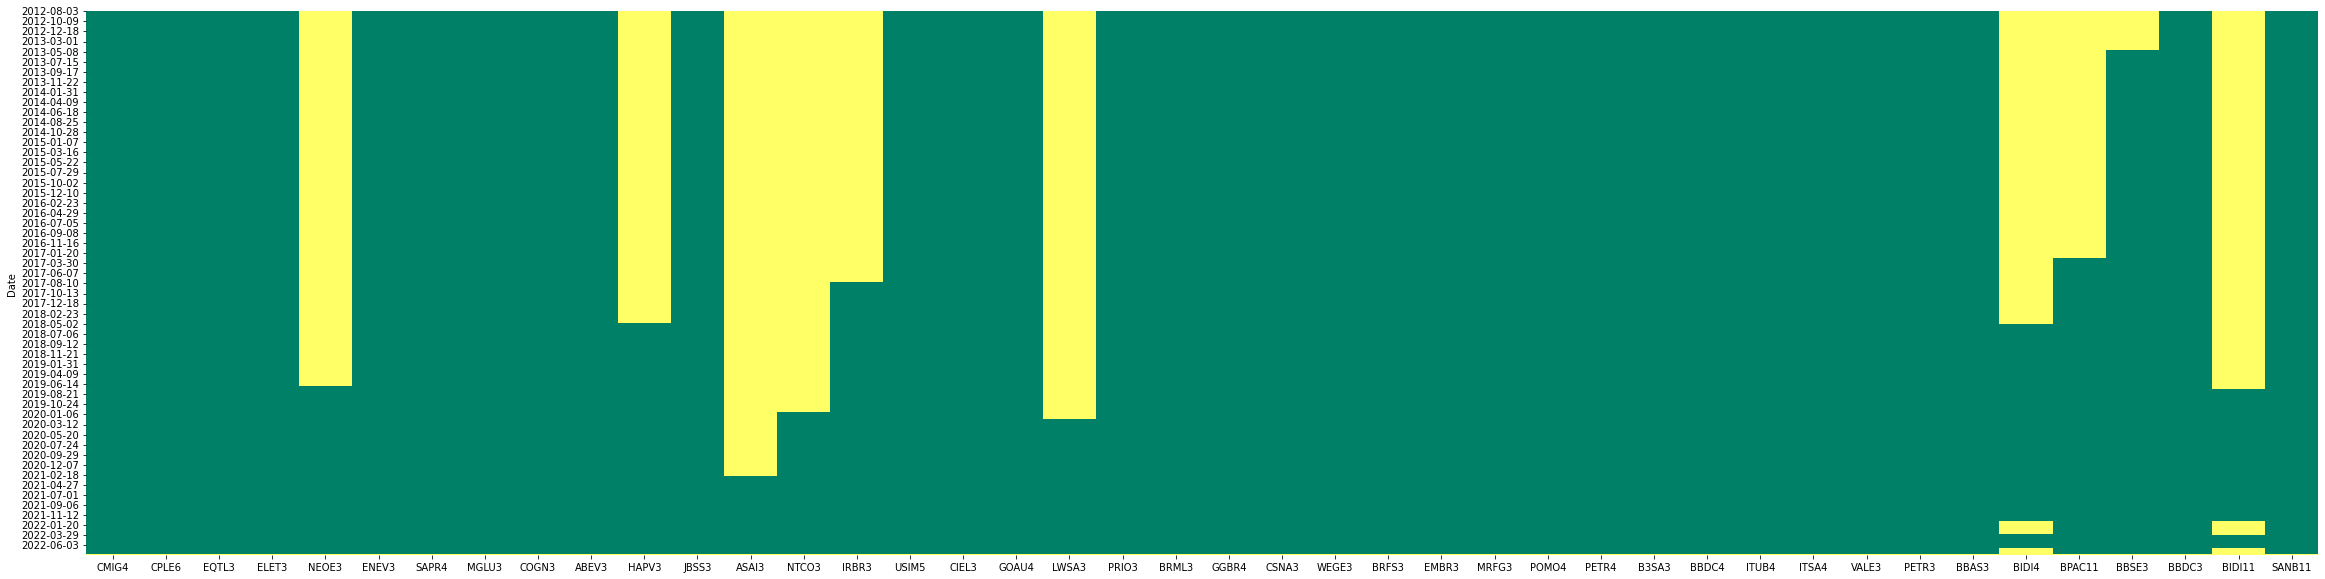

In [7]:
# Mapa dos erros nos títulos
%matplotlib inline
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(), cbar=False, cmap='summer')

In [8]:
# Títulos com mais de 5% de erro
test = output.isnull().sum()/(output.count()+output.isnull().sum())*100
test.loc[test>5].index

Index(['NEOE3', 'HAPV3', 'ASAI3', 'NTCO3', 'IRBR3', 'LWSA3', 'BIDI4', 'BPAC11',
       'BBSE3', 'BIDI11'],
      dtype='object')

C:\Users\Murilo\AppData\Local\Temp\ipykernel_8416\2251072687.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_droped = df.dropna(0)


['Erros', 0, 'Ativos', 32]

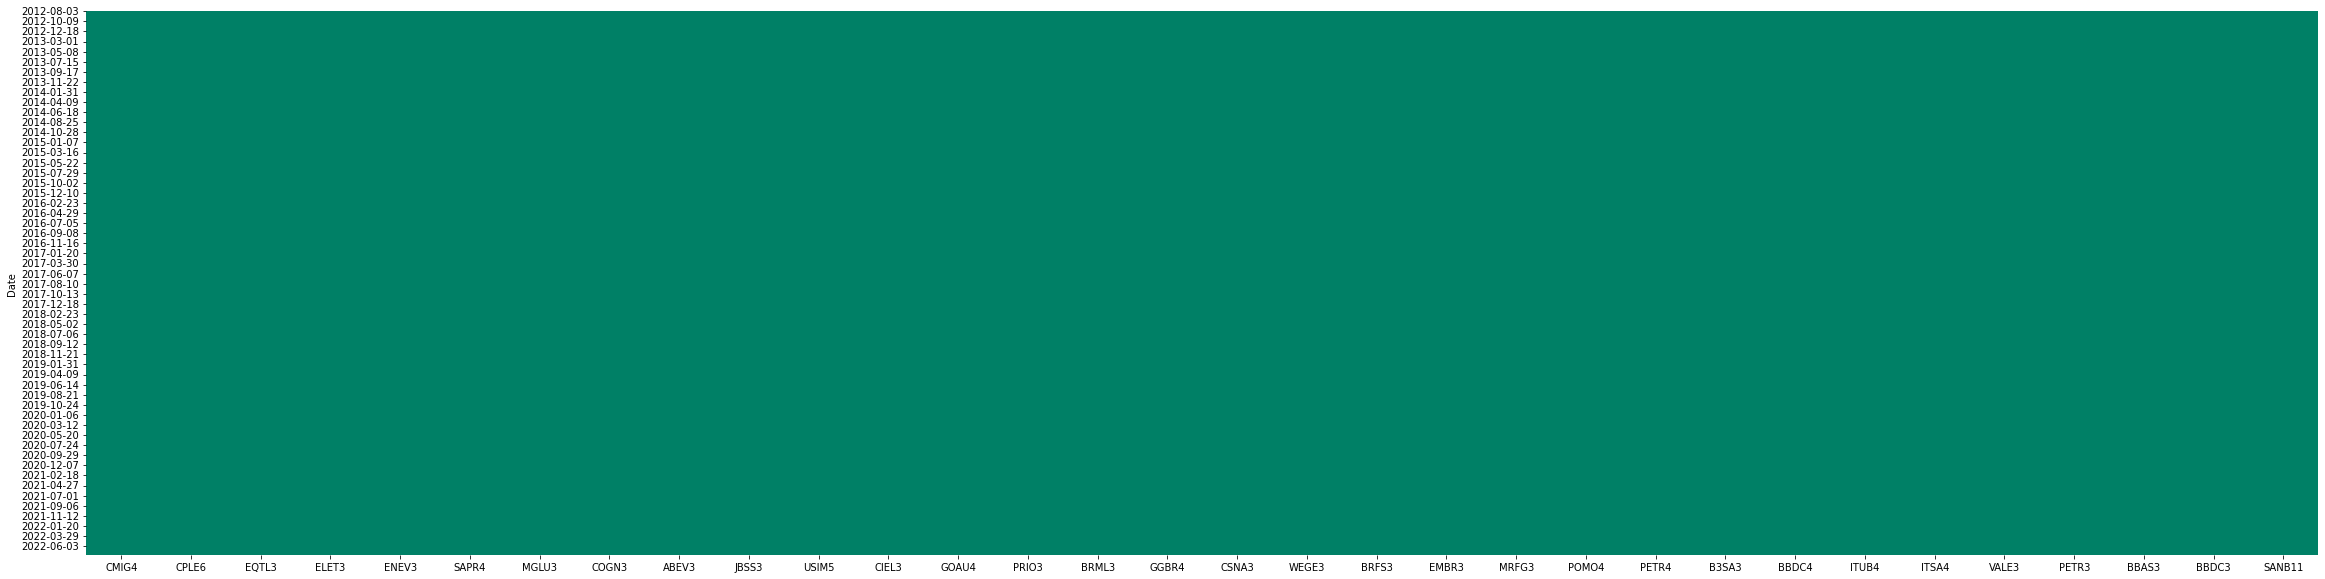

In [9]:
df = output.loc[:, output.isnull().sum()/output.count()*100 < 5]
df_droped = df.dropna(0)
plt.figure(figsize=(40,10))
sns.heatmap(df_droped.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(df_droped.isnull().sum()),"Ativos",len(df.columns)]

<AxesSubplot:>

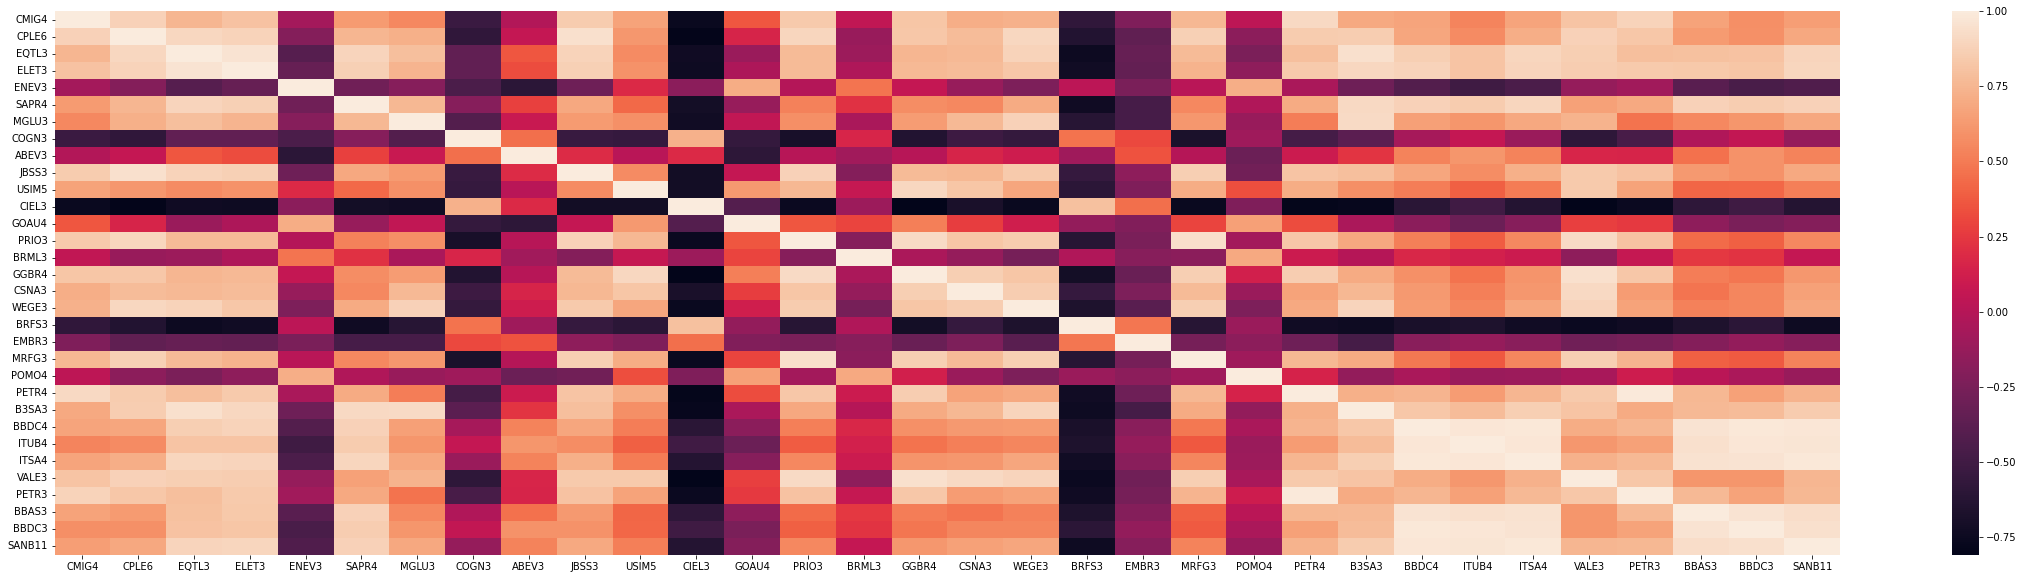

In [10]:
plt.figure(figsize=(40,10))
sns.heatmap(df_droped.corr())

In [11]:
df_droped.to_csv("InputsAtivosPreTratados.csv")

#### 2. Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis);

In [12]:
df_droped = pd.read_csv('InputsAtivosPreTratados.csv')

In [13]:
df_droped['Date'] = pd.to_datetime(df_droped['Date'], utc=True)
df_droped.set_index('Date', inplace=True)

In [14]:
#walk forward analysis

output = df_droped
anos=sorted(list(set(output.index.year)))
treino=[[a,a+1,a+2] for a in anos[:-3]]
teste=anos[3:]

for tr,te in zip(treino[:7],teste[:7]):

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))

[2012, 2013, 2014] [2015]
[2013, 2014, 2015] [2016]
[2014, 2015, 2016] [2017]
[2015, 2016, 2017] [2018]
[2016, 2017, 2018] [2019]
[2017, 2018, 2019] [2020]
[2018, 2019, 2020] [2021]


#### 3. Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe);

Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'MGLU3', 'JBSS3', 'PRIO3', 'B3SA3']


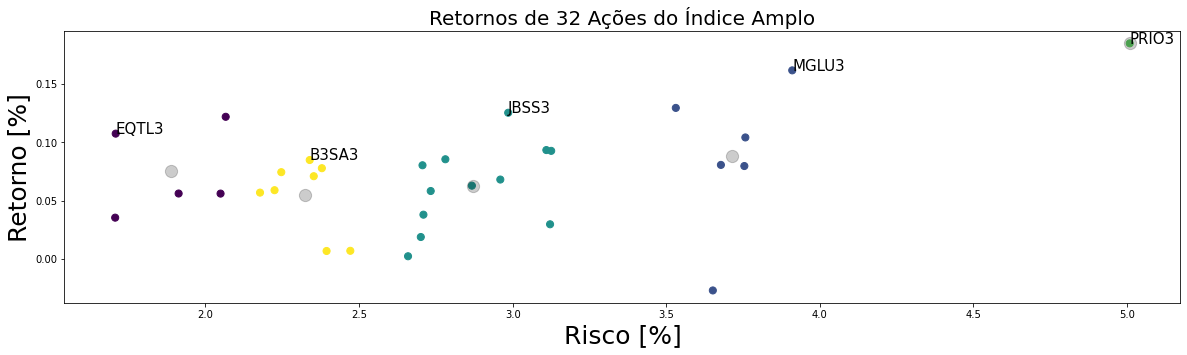

In [15]:
#declaração da função de KMeans para clasterização não supervisionada 
def SelecionaAtivos(df, N_Cluster):
    %matplotlib inline 
    from sklearn.cluster import KMeans
    output =df
    retornos=100*output.pct_change()
    stocks=retornos.columns

    X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

    N=N_Cluster

    kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
    y_kmeans = kmeans.predict(X)

    fig = plt.subplots(figsize=(20,5))

    ax1=plt.subplot(1,1, 1) 
    ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=20)
    ax1.set_xlabel('Risco [%]',fontsize=25)
    ax1.set_ylabel('Retorno [%]',fontsize=25)

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

    best=[]
    for i in range(N):
        ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
        best.append(ind[ind==np.max(ind)])
    rb=list(pd.DataFrame(best).columns)
    print("Ativos com Melhor Relação em Cada Cluster:", rb)

    for r in rb:
        plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)
    
    plt.show()
    return rb    
    
ListaAtivos = SelecionaAtivos(df_droped, 5)

[2012, 2013, 2014] [2015]
Ativos com Melhor Relação em Cada Cluster: ['BBDC3', 'PRIO3', 'JBSS3', 'BRFS3', 'COGN3']


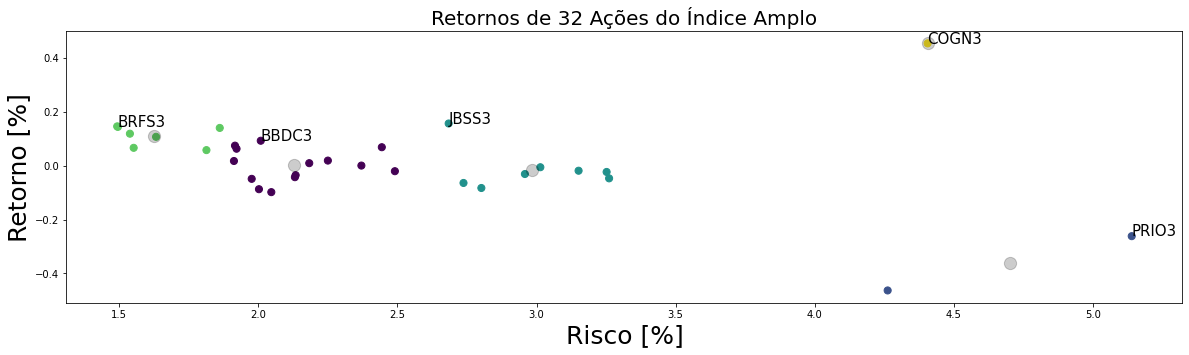

[2013, 2014, 2015] [2016]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'ELET3', 'JBSS3', 'PRIO3', 'EMBR3']


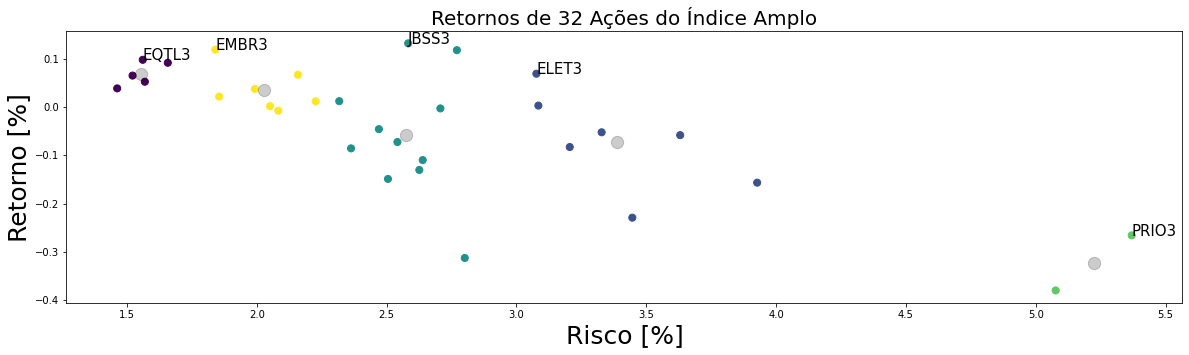

[2014, 2015, 2016] [2017]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'MGLU3', 'PRIO3', 'SANB11', 'ELET3']


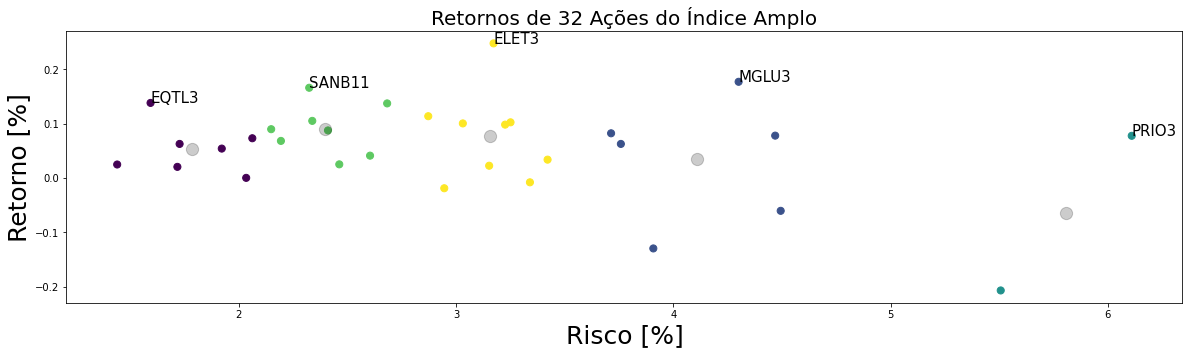

[2015, 2016, 2017] [2018]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3', 'SANB11', 'ELET3', 'EQTL3', 'PRIO3']


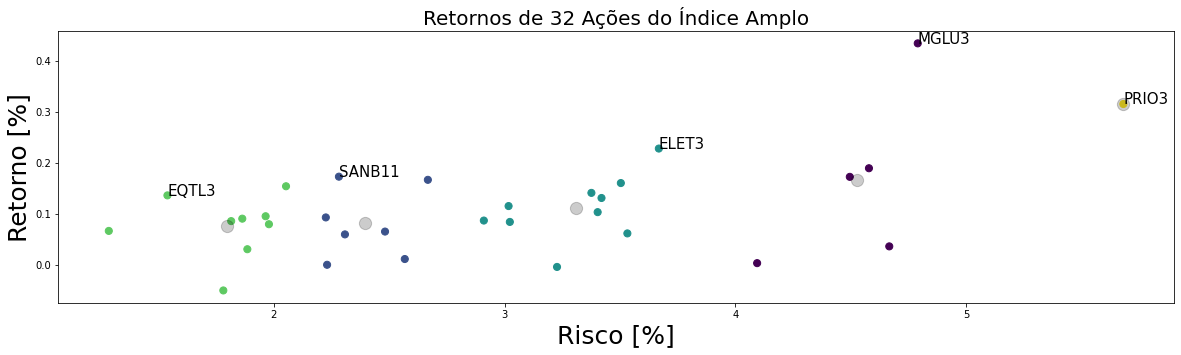

[2016, 2017, 2018] [2019]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'VALE3', 'PRIO3', 'MGLU3', 'SAPR4']


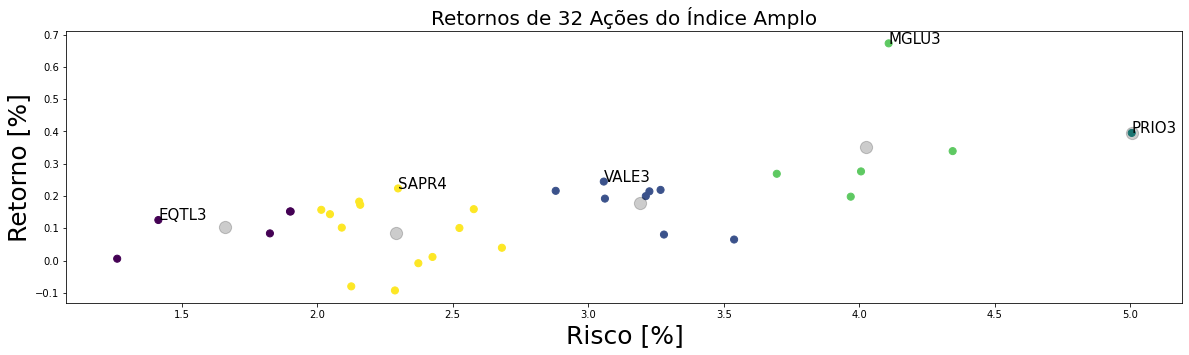

[2017, 2018, 2019] [2020]
Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'VALE3', 'MGLU3', 'ELET3', 'ENEV3']


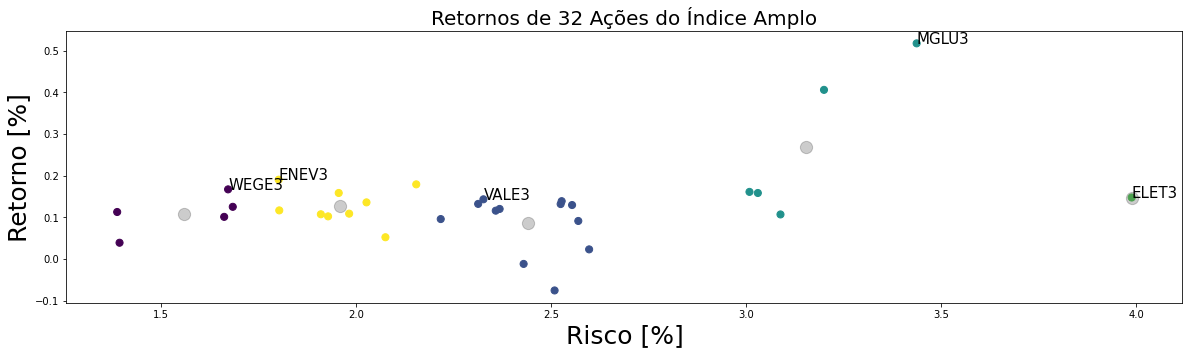

[2018, 2019, 2020] [2021]
Ativos com Melhor Relação em Cada Cluster: ['JBSS3', 'ENEV3', 'MGLU3', 'PRIO3', 'WEGE3']


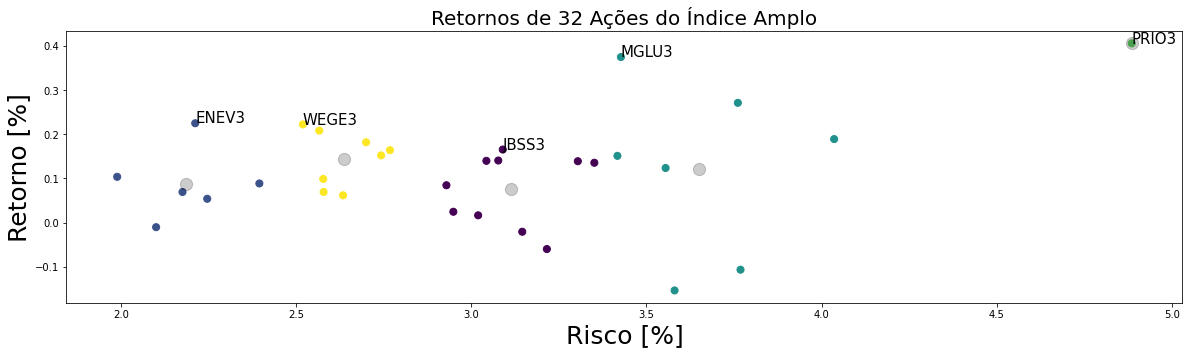

In [16]:
# Configuração de parametros

output =df_droped 

for tr,te in zip(treino[:7],teste[:7]):

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)  

#### 4 . Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de 100.000,00 reais;

In [17]:
#Declaração da função de Markovitz com base na maior relação de Sharpe
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(df[ListaAtivos].dropna(),1000)

[2012, 2013, 2014] [2015]
Ativos com Melhor Relação em Cada Cluster: ['BBDC3', 'PRIO3', 'JBSS3', 'BRFS3', 'COGN3']


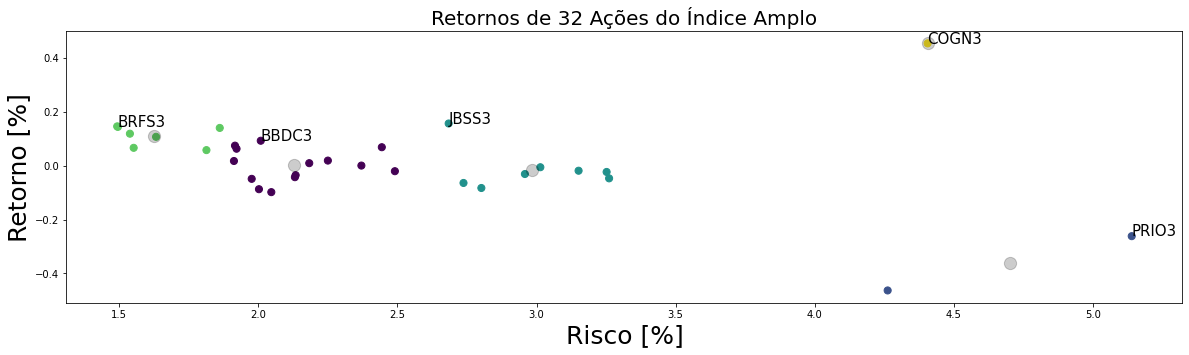

Coeficiente de alocação de capital (q)
[[ 0.52691849]
 [ 0.19810334]
 [ 0.41498206]
 [ 0.00125028]
 [-0.14125418]]
[2013, 2014, 2015] [2016]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'ELET3', 'JBSS3', 'PRIO3', 'EMBR3']


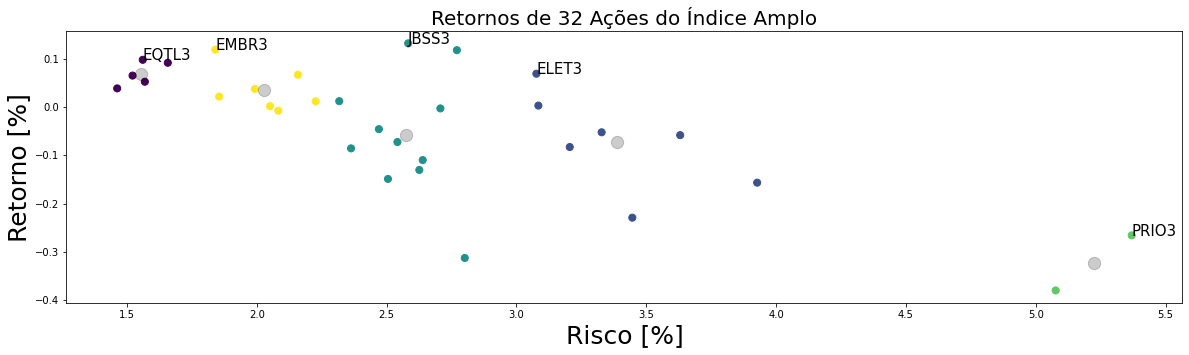

Coeficiente de alocação de capital (q)
[[-0.00554106]
 [ 0.37121331]
 [-0.07599529]
 [ 0.48404378]
 [ 0.22627927]]
[2014, 2015, 2016] [2017]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'MGLU3', 'PRIO3', 'SANB11', 'ELET3']


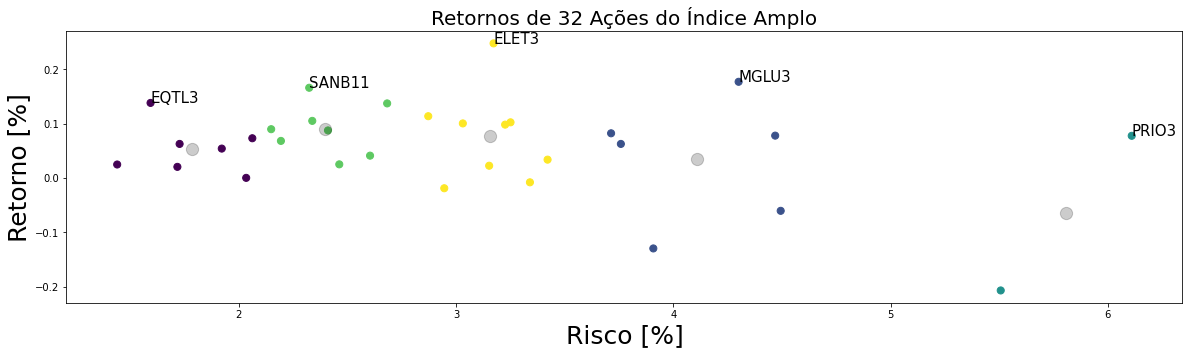

Coeficiente de alocação de capital (q)
[[-0.00432416]
 [ 1.59382415]
 [-0.522004  ]
 [-0.09537353]
 [ 0.02787755]]
[2015, 2016, 2017] [2018]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3', 'SANB11', 'ELET3', 'EQTL3', 'PRIO3']


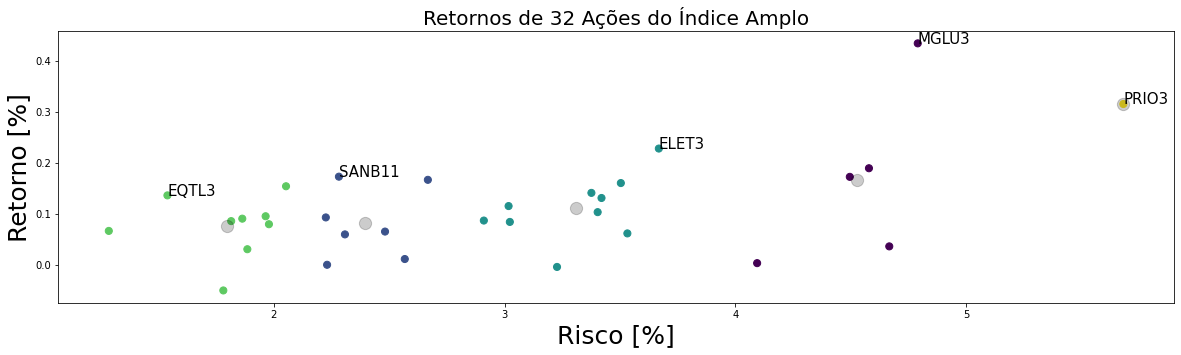

Coeficiente de alocação de capital (q)
[[ 6.77899276]
 [ 0.04398731]
 [ 0.80906493]
 [-4.04551598]
 [-2.58652902]]
[2016, 2017, 2018] [2019]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'VALE3', 'PRIO3', 'MGLU3', 'SAPR4']


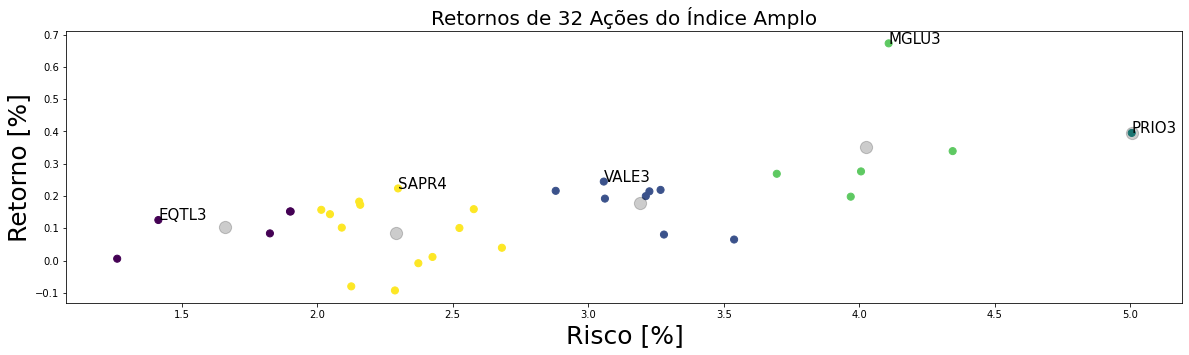

Coeficiente de alocação de capital (q)
[[-0.44215874]
 [-0.05519893]
 [ 0.44659976]
 [ 0.41947938]
 [ 0.63127852]]
[2017, 2018, 2019] [2020]
Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'VALE3', 'MGLU3', 'ELET3', 'ENEV3']


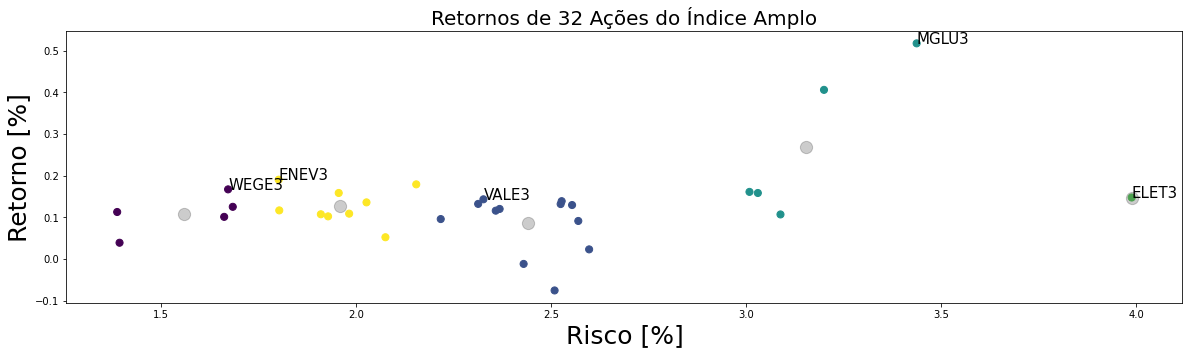

Coeficiente de alocação de capital (q)
[[ 1.57661487]
 [ 0.40068104]
 [-3.26795704]
 [ 0.23357624]
 [ 2.05708489]]
[2018, 2019, 2020] [2021]
Ativos com Melhor Relação em Cada Cluster: ['JBSS3', 'ENEV3', 'MGLU3', 'PRIO3', 'WEGE3']


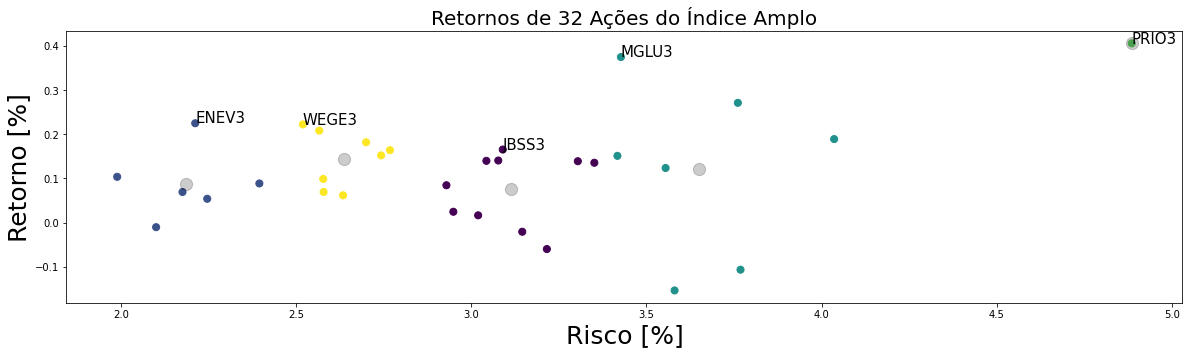

Coeficiente de alocação de capital (q)
[[-1.7516082 ]
 [ 1.34944603]
 [ 4.23005213]
 [ 0.4873371 ]
 [-3.31522706]]


,CICLO,ANOS_TREINO,ANOS_TESTE,ATIVO,PESOS,OPERAÇÃO,POSICAO_1D_TREINO,POSICAO_UD_TREINO,RESULTADO_TREINO,POSICAO_1D_TESTE,POSICAO_UD_TESTE,RESULTADO_TESTE
0,1,"[2012, 2013, 2014]",[2015],BBDC3,0.526918,compra,52691.849469,8.103359e+04,2.834174e+04,8.072668e+04,6.147702e+04,-1.924965e+04
1,1,"[2012, 2013, 2014]",[2015],PRIO3,0.198103,compra,19810.333787,1.906745e+03,-1.790359e+04,1.815947e+03,1.011152e+03,-8.047947e+02
2,1,"[2012, 2013, 2014]",[2015],JBSS3,0.414982,compra,41498.206345,8.490203e+04,4.340382e+04,8.033332e+04,9.506608e+04,1.473275e+04
3,1,"[2012, 2013, 2014]",[2015],BRFS3,0.001250,compra,125.028085,2.783034e+02,1.532754e+02,2.749799e+02,2.467937e+02,-2.818623e+01
4,1,"[2012, 2013, 2014]",[2015],COGN3,-0.141254,venda,-14125.417687,-1.306472e+05,1.165218e+05,-1.263777e+05,-8.266556e+04,-4.371209e+04
5,2,"[2013, 2014, 2015]",[2016],EQTL3,-0.005541,venda,-554.106443,-1.044540e+03,4.904339e+02,-1.006712e+03,-1.695728e+03,6.890155e+02
6,2,"[2013, 2014, 2015]",[2016],ELET3,0.371213,compra,37121.331065,4.373069e+04,6.609361e+03,4.122529e+04,1.731766e+05,1.319513e+05
7,2,"[2013, 2014, 2015]",[2016],JBSS3,-0.075995,venda,-7599.529482,-1.576483e+04,8.165304e+03,-1.538188e+04,-1.523549e+04,-1.463939e+02
8,2,"[2013, 2014, 2015]",[2016],PRIO3,0.484044,compra,48404.378203,2.376568e+03,-4.602781e+04,2.231064e+03,4.225441e+03,1.994377e+03
9,2,"[2013, 2014, 2015]",[2016],EMBR3,0.226279,compra,22627.926658,4.811308e+04,2.548515e+04,4.672658e+04,2.563540e+04,-2.109119e+04


In [18]:
# Configuração de parametrso
capital=100000
output =df_droped 
anos=sorted(list(set(output.index.year)))
treino=[[a,a+1,a+2] for a in anos[:-3]]
teste=anos[3:]

_CICLO =[]
_ATIVO=[]
_PESOS=[]
_OPERACAO=[]
_POSICAO_1D_TREINO=[]
_POSICAO_UD_TREINO=[]
_RESULTADO_TREINO=[]
_POSICAO_1D_TESTE=[]
_POSICAO_UD_TESTE=[]
_RESULTADO_TESTE=[]
_ANOS_TREINO=[]
_ANOS_TESTE=[]

Performance_Df = pd.DataFrame(columns=[
    'CICLO',
    'ANOS_TREINO',
    'ANOS_TESTE',
    'ATIVO',
    'PESOS',
    'OPERAÇÃO',
    'POSICAO_1D_TREINO',
    'POSICAO_UD_TREINO',
    'RESULTADO_TREINO',
    'POSICAO_1D_TESTE',
    'POSICAO_UD_TESTE',
    'RESULTADO_TESTE'
])

operacao=""
ciclo_flag=0
for tr,te in zip(treino[:7],teste[:7]):
    ciclo_flag = ciclo_flag +1

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)
    
    #seleciona os registros dos ativos retornados pelo kmeans
    df_carteira_treino = tr_aux[ListaAtivos]
    df_carteira_teste = te_aux[ListaAtivos]
    
    #calcula os pesos de markovitz
    qm,mu_m,sigma_m = TPM_Maior_Sharpe(df_carteira_treino.dropna(),1000)
    
    # Calcular montante para comprar ou vendar
    pesos=qm
    
    print("Coeficiente de alocação de capital (q)")
    print(pesos)

    st_in =[]
    for i in range(len(ListaAtivos)):
        st_in.append(pesos[i]*capital/df_carteira_treino[df_carteira_treino.columns[i]].iloc[0])
        _PESOS.append(pesos[i][0])
        
    
    for n in range(len(ListaAtivos)):
        _CICLO.append(ciclo_flag)
        _ANOS_TREINO.append(str(anosTreino))
        _ANOS_TESTE.append(str(anosTeste))
        _ATIVO.append(ListaAtivos[n])
        
        # entrar comprado
        if st_in[n][0] >= 0:
            operacao = "compra"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_Ud_in_sample - posicao_1d_in_sample

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_Ud_teste - posicao_1d_teste


        # entra vendido
        else: 
            operacao ="venda"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_1d_in_sample - posicao_Ud_in_sample 

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_1d_teste - posicao_Ud_teste
                
        _OPERACAO.append(operacao)
        _POSICAO_1D_TREINO.append(posicao_1d_in_sample)
        _POSICAO_UD_TREINO.append(posicao_Ud_in_sample)
        _RESULTADO_TREINO.append(resultado)
        _POSICAO_1D_TESTE.append(posicao_1d_teste)
        _POSICAO_UD_TESTE.append(posicao_Ud_teste)
        _RESULTADO_TESTE.append(resultado_teste)
        
        
Performance_Df["CICLO"]=_CICLO
Performance_Df["ANOS_TREINO"]=_ANOS_TREINO
Performance_Df["ANOS_TESTE"]=_ANOS_TESTE
Performance_Df["CICLO"]=_CICLO
Performance_Df["ATIVO"]=_ATIVO
Performance_Df["PESOS"]=_PESOS
Performance_Df["OPERAÇÃO"]=_OPERACAO
Performance_Df["POSICAO_1D_TREINO"]=_POSICAO_1D_TREINO
Performance_Df["POSICAO_UD_TREINO"]=_POSICAO_UD_TREINO
Performance_Df["RESULTADO_TREINO"]=_RESULTADO_TREINO
Performance_Df["POSICAO_1D_TESTE"]=_POSICAO_1D_TESTE
Performance_Df["POSICAO_UD_TESTE"]=_POSICAO_UD_TESTE
Performance_Df["RESULTADO_TESTE"]=_RESULTADO_TESTE
        
Performance_Df

In [19]:
Performance_Df.to_csv("Carteira.csv", header=False)

#### 5. Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa;

[2012, 2013, 2014] [2015]
Ativos com Melhor Relação em Cada Cluster: ['BBDC3', 'PRIO3', 'JBSS3', 'BRFS3', 'COGN3']


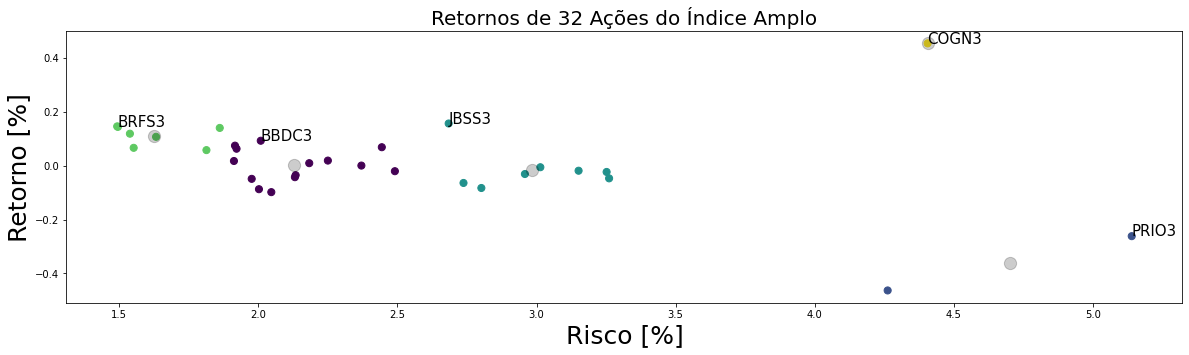

[[ 0.52691849]
 [ 0.19810334]
 [ 0.41498206]
 [ 0.00125028]
 [-0.14125418]]


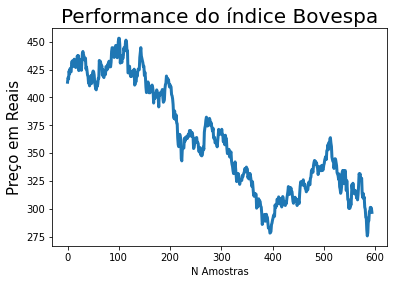

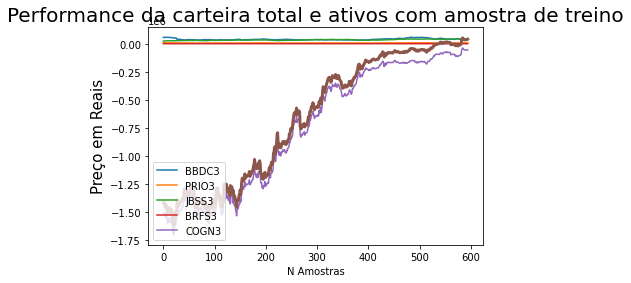

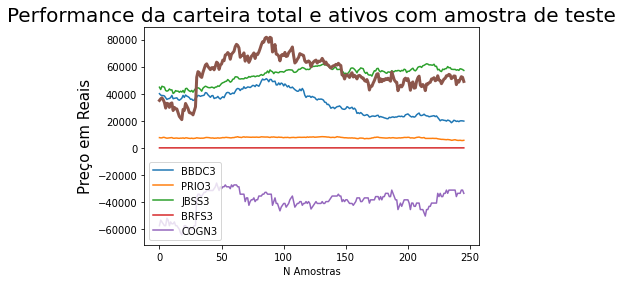

[2013, 2014, 2015] [2016]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'ELET3', 'JBSS3', 'PRIO3', 'EMBR3']


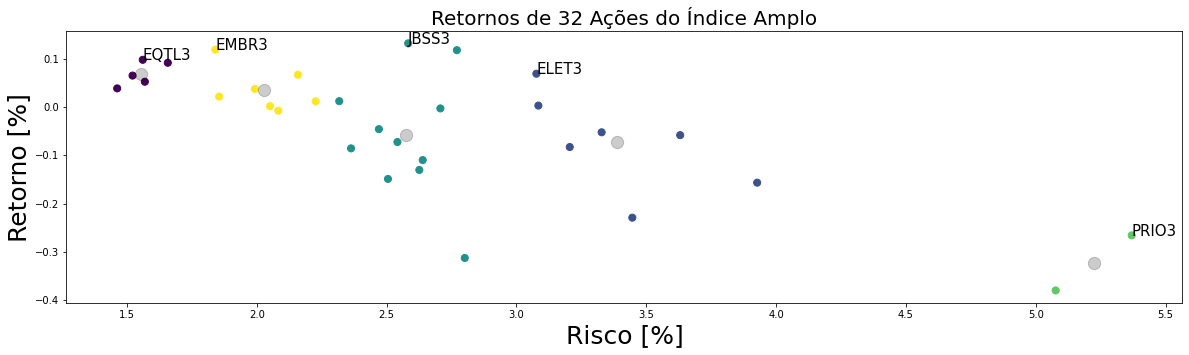

[[-0.00554106]
 [ 0.37121331]
 [-0.07599529]
 [ 0.48404378]
 [ 0.22627927]]


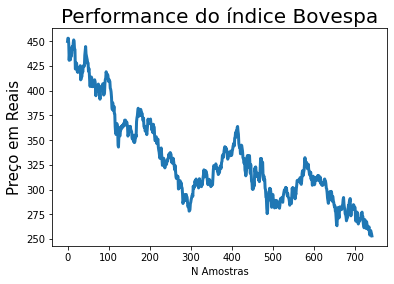

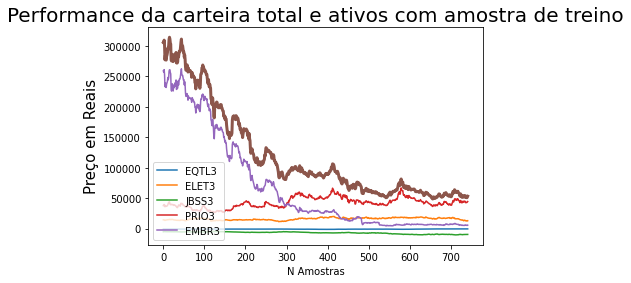

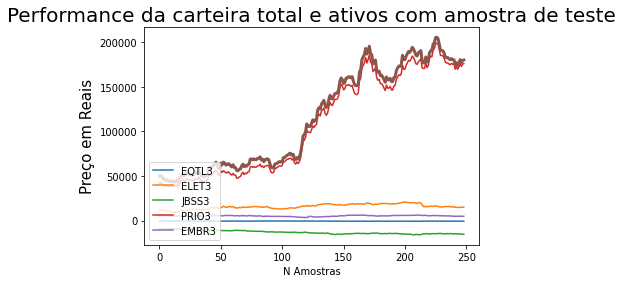

[2014, 2015, 2016] [2017]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'MGLU3', 'PRIO3', 'SANB11', 'ELET3']


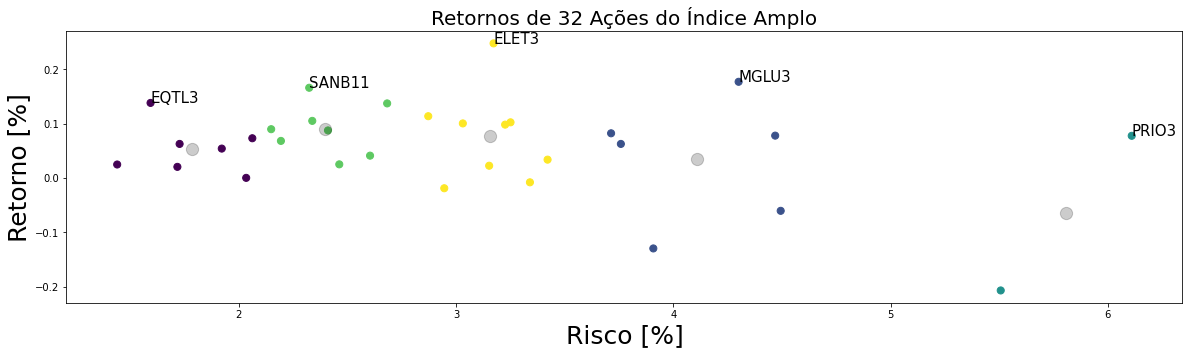

[[-0.00432416]
 [ 1.59382415]
 [-0.522004  ]
 [-0.09537353]
 [ 0.02787755]]


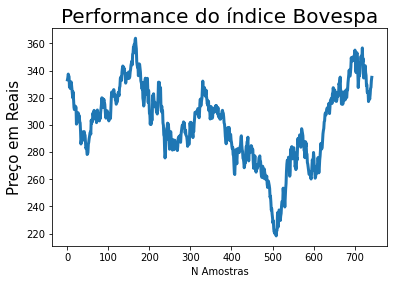

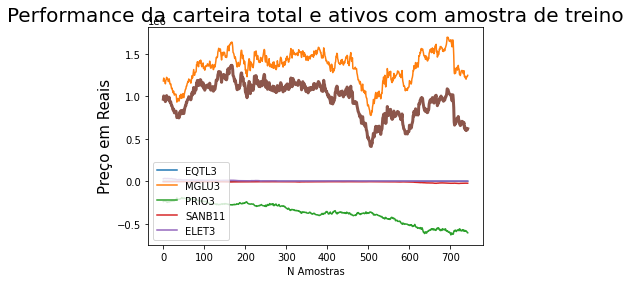

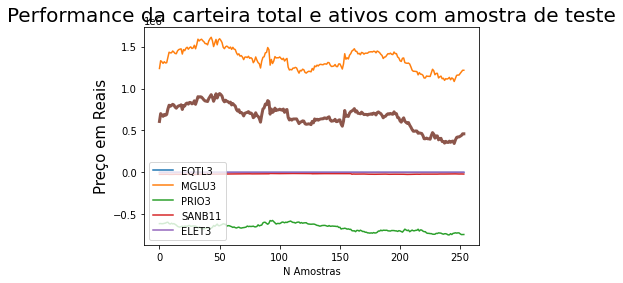

[2015, 2016, 2017] [2018]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3', 'SANB11', 'ELET3', 'EQTL3', 'PRIO3']


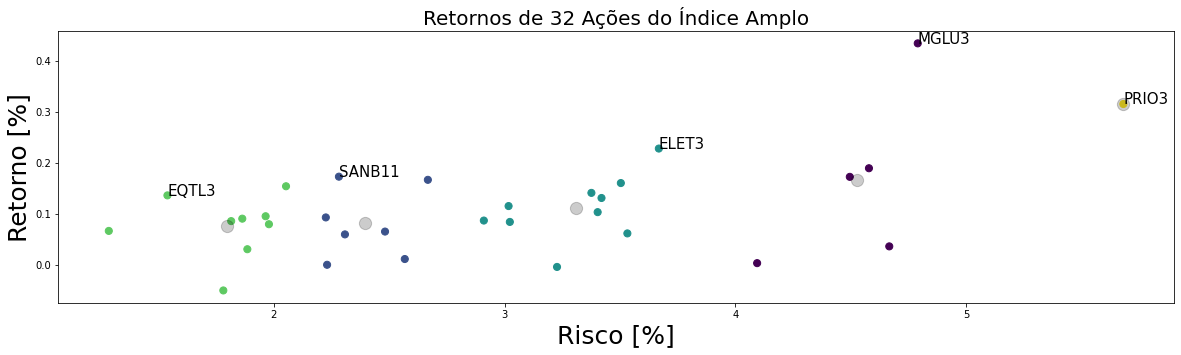

[[ 6.77899276]
 [ 0.04398731]
 [ 0.80906493]
 [-4.04551598]
 [-2.58652902]]


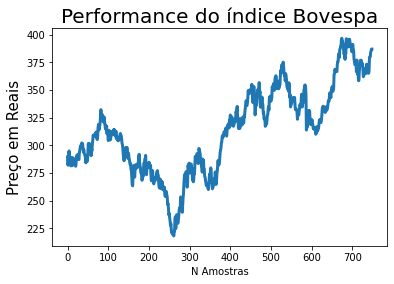

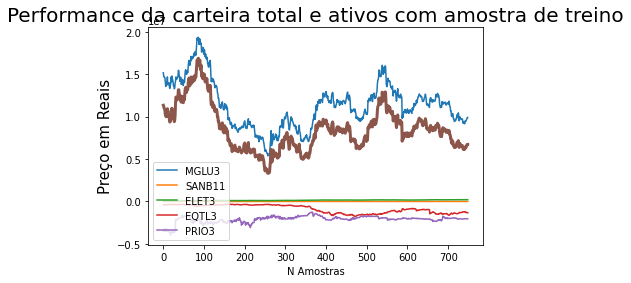

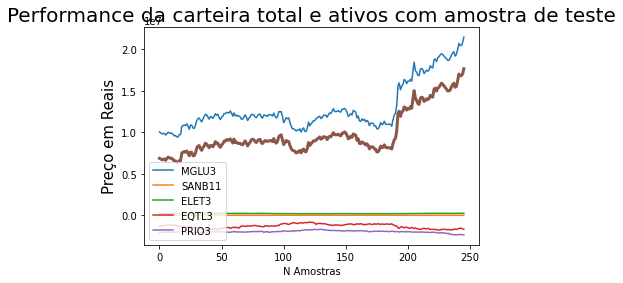

[2016, 2017, 2018] [2019]
Ativos com Melhor Relação em Cada Cluster: ['EQTL3', 'VALE3', 'PRIO3', 'MGLU3', 'SAPR4']


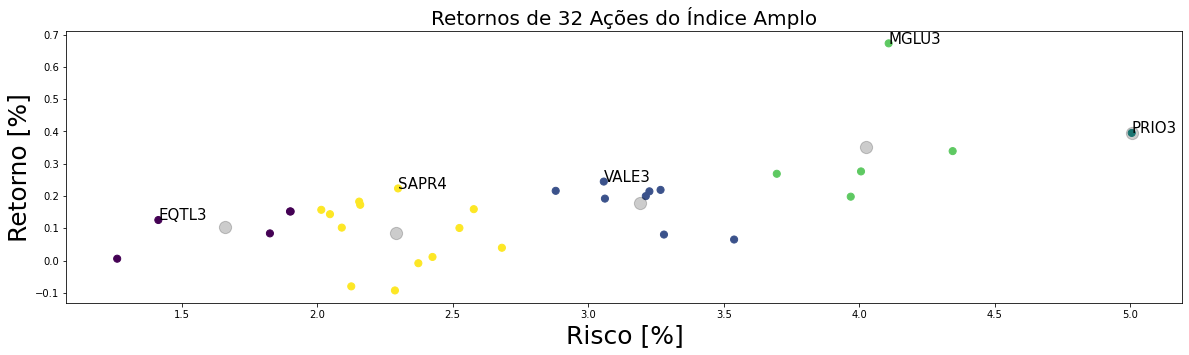

[[-0.44215874]
 [-0.05519893]
 [ 0.44659976]
 [ 0.41947938]
 [ 0.63127852]]


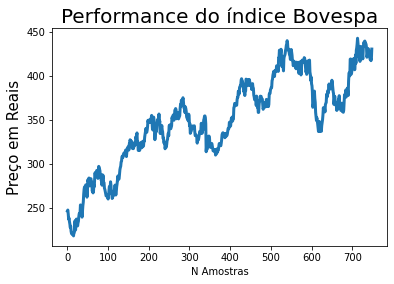

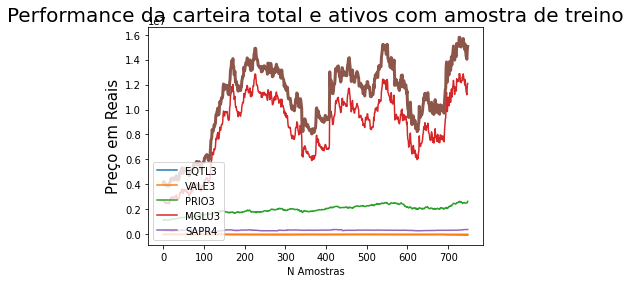

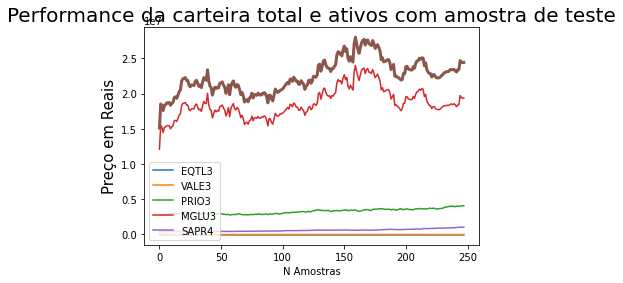

[2017, 2018, 2019] [2020]
Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'VALE3', 'MGLU3', 'ELET3', 'ENEV3']


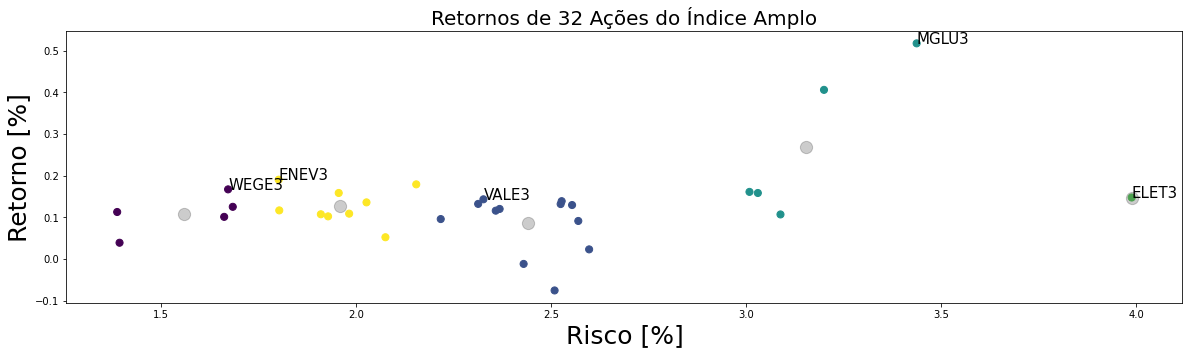

[[ 1.57661487]
 [ 0.40068104]
 [-3.26795704]
 [ 0.23357624]
 [ 2.05708489]]


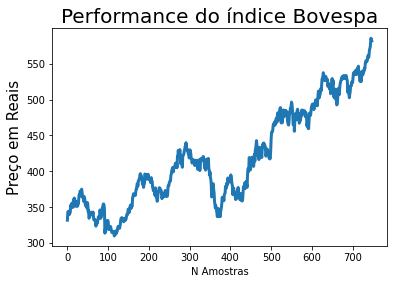

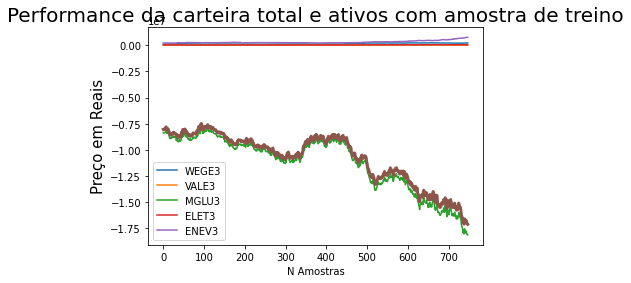

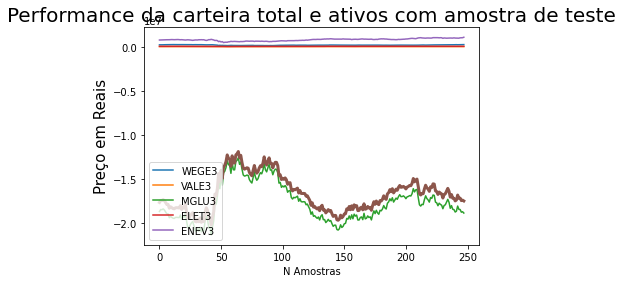

[2018, 2019, 2020] [2021]
Ativos com Melhor Relação em Cada Cluster: ['JBSS3', 'ENEV3', 'MGLU3', 'PRIO3', 'WEGE3']


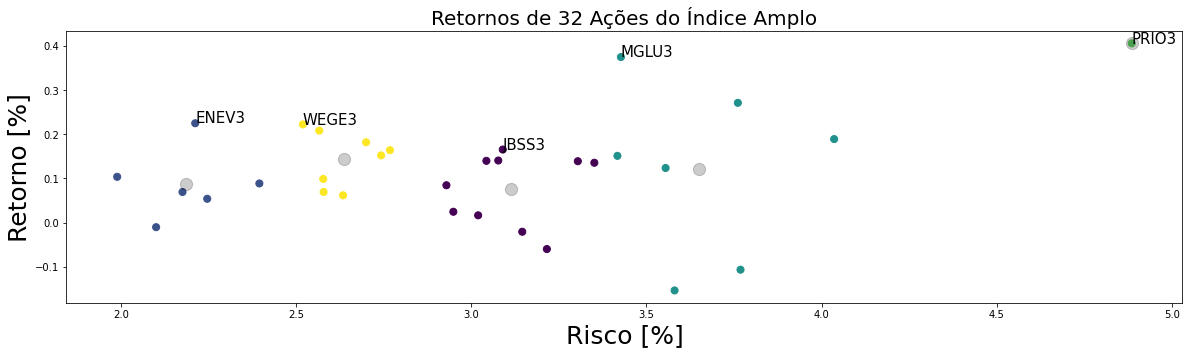

[[-1.7516082 ]
 [ 1.34944603]
 [ 4.23005213]
 [ 0.4873371 ]
 [-3.31522706]]


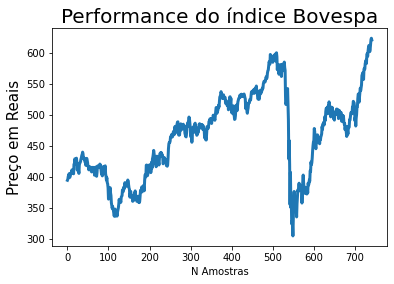

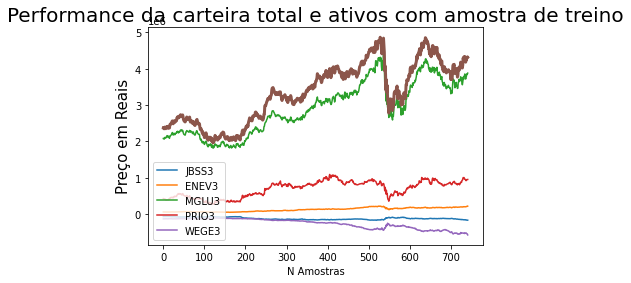

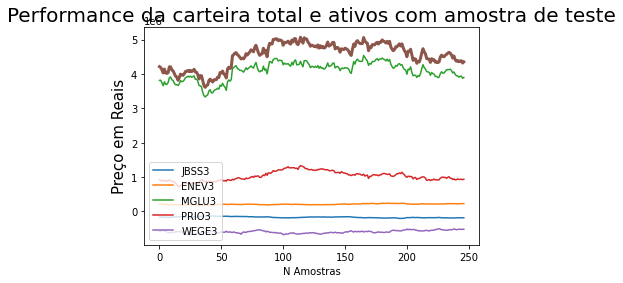

,CICLO,ANOS_TREINO,ANOS_TESTE,ATIVO,PESOS,OPERAÇÃO,POSICAO_1D_TREINO,POSICAO_UD_TREINO,RESULTADO_TREINO,POSICAO_1D_TESTE,POSICAO_UD_TESTE,RESULTADO_TESTE,IBOVESPA_1D_TREINO,IBOVESPA_UD_TREINO,IBOVESPA_RESULTADO_TREINO,IBOVESPA_1D_TESTE,IBOVESPA_UD_TESTE,IBOVESPA_RESULTADO_TESTE
0,1,"[2012, 2013, 2014]",[2015],BBDC3,0.526918,compra,52691.849469,8.103359e+04,2.834174e+04,8.072668e+04,6.147702e+04,-1.924965e+04,413.660496,296.797767,-116.862730,289.569072,253.143586,-36.425487
1,1,"[2012, 2013, 2014]",[2015],PRIO3,0.198103,compra,19810.333787,1.906745e+03,-1.790359e+04,1.815947e+03,1.011152e+03,-8.047947e+02,413.660496,296.797767,-116.862730,289.569072,253.143586,-36.425487
2,1,"[2012, 2013, 2014]",[2015],JBSS3,0.414982,compra,41498.206345,8.490203e+04,4.340382e+04,8.033332e+04,9.506608e+04,1.473275e+04,413.660496,296.797767,-116.862730,289.569072,253.143586,-36.425487
3,1,"[2012, 2013, 2014]",[2015],BRFS3,0.001250,compra,125.028085,2.783034e+02,1.532754e+02,2.749799e+02,2.467937e+02,-2.818623e+01,413.660496,296.797767,-116.862730,289.569072,253.143586,-36.425487
4,1,"[2012, 2013, 2014]",[2015],COGN3,-0.141254,venda,-14125.417687,-1.306472e+05,1.165218e+05,-1.263777e+05,-8.266556e+04,-4.371209e+04,413.660496,296.797767,-116.862730,289.569072,253.143586,-36.425487
5,2,"[2013, 2014, 2015]",[2016],EQTL3,-0.005541,venda,-554.106443,-1.044540e+03,4.904339e+02,-1.006712e+03,-1.695728e+03,6.890155e+02,449.919167,253.143586,-196.775581,246.626199,335.058015,88.431816
6,2,"[2013, 2014, 2015]",[2016],ELET3,0.371213,compra,37121.331065,4.373069e+04,6.609361e+03,4.122529e+04,1.731766e+05,1.319513e+05,449.919167,253.143586,-196.775581,246.626199,335.058015,88.431816
7,2,"[2013, 2014, 2015]",[2016],JBSS3,-0.075995,venda,-7599.529482,-1.576483e+04,8.165304e+03,-1.538188e+04,-1.523549e+04,-1.463939e+02,449.919167,253.143586,-196.775581,246.626199,335.058015,88.431816
8,2,"[2013, 2014, 2015]",[2016],PRIO3,0.484044,compra,48404.378203,2.376568e+03,-4.602781e+04,2.231064e+03,4.225441e+03,1.994377e+03,449.919167,253.143586,-196.775581,246.626199,335.058015,88.431816
9,2,"[2013, 2014, 2015]",[2016],EMBR3,0.226279,compra,22627.926658,4.811308e+04,2.548515e+04,4.672658e+04,2.563540e+04,-2.109119e+04,449.919167,253.143586,-196.775581,246.626199,335.058015,88.431816


In [20]:
# Configuração de parametrso

output =df_droped 
anos=sorted(list(set(output.index.year)))
treino=[[a,a+1,a+2] for a in anos[:-3]]
teste=anos[3:]
capital=100000


_CICLO =[]
_ATIVO=[]
_PESOS=[]
_OPERACAO=[]
_POSICAO_1D_TREINO=[]
_POSICAO_UD_TREINO=[]
_RESULTADO_TREINO=[]
_POSICAO_1D_TESTE=[]
_POSICAO_UD_TESTE=[]
_RESULTADO_TESTE=[]
_ANOS_TREINO=[]
_ANOS_TESTE=[]
_IBOVESPA_1D_TREINO=[]
_IBOVESPA_UD_TREINO=[]
_IBOVESPA_RESULTADO_TREINO=[]
_IBOVESPA_1D_TESTE=[]
_IBOVESPA_UD_TESTE=[]
_IBOVESPA_RESULTADO_TESTE=[]



Performance_Df = pd.DataFrame(columns=[
    'CICLO',
    'ANOS_TREINO',
    'ANOS_TESTE',
    'ATIVO',
    'PESOS',
    'OPERAÇÃO',
    'POSICAO_1D_TREINO',
    'POSICAO_UD_TREINO',
    'RESULTADO_TREINO',
    'POSICAO_1D_TESTE',
    'POSICAO_UD_TESTE',
    'RESULTADO_TESTE'
])

operacao=""
ciclo_flag=0
for tr,te in zip(treino[:7],teste[:7]):
    ciclo_flag = ciclo_flag +1

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)
    
    #seleciona os registros dos ativos retornados pelo kmeans
    df_carteira_treino = tr_aux[ListaAtivos]
    df_carteira_teste = te_aux[ListaAtivos]
    
    #calcula os pesos de markovitz
    qm,mu_m,sigma_m = TPM_Maior_Sharpe(df_carteira_treino.dropna(),1000)
    
    # Calcular montante para comprar ou vendar
    pesos=qm
    print(pesos)

    st_in =[]
    for i in range(len(ListaAtivos)):
        st_in.append(pesos[i]*capital/df_carteira_treino[df_carteira_treino.columns[i]].iloc[0])
        _PESOS.append(pesos[i][0])
        
    
    for n in range(len(ListaAtivos)):
        _CICLO.append(ciclo_flag)
        _ANOS_TREINO.append(str(anosTreino))
        _ANOS_TESTE.append(str(anosTeste))
        _ATIVO.append(ListaAtivos[n])
        
        # entrar comprado
        if st_in[n][0] >= 0:
            operacao = "compra"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_Ud_in_sample - posicao_1d_in_sample

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_Ud_teste - posicao_1d_teste


        # entra vendido
        else: 
            operacao ="venda"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_1d_in_sample - posicao_Ud_in_sample 

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_1d_teste - posicao_Ud_teste
            
        # CALCULO DA PERFORMANCE DO IBOVESPA
        ibovespa_1d_in_sample = tr_aux.sum(axis=1).values[0]
        ibovespa_Ud_in_sample = tr_aux.sum(axis=1).values[-1] 
        ibovespa_resultado_treino = posicao_Ud_in_sample - posicao_1d_in_sample

        ibovespa_1d_teste = te_aux.sum(axis=1).values[0]
        ibovespa_Ud_teste = te_aux.sum(axis=1).values[-1]
        ibovespa_resultado_teste = ibovespa_Ud_teste - ibovespa_1d_teste
        
        _IBOVESPA_1D_TREINO.append(ibovespa_1d_in_sample)
        _IBOVESPA_UD_TREINO.append(ibovespa_Ud_in_sample)
        _IBOVESPA_RESULTADO_TREINO.append(ibovespa_resultado_treino)
        _IBOVESPA_1D_TESTE.append(ibovespa_1d_teste)
        _IBOVESPA_UD_TESTE.append(ibovespa_Ud_teste)
        _IBOVESPA_RESULTADO_TESTE.append(ibovespa_resultado_teste)
        
        
        
        
                
        _OPERACAO.append(operacao)
        _POSICAO_1D_TREINO.append(posicao_1d_in_sample)
        _POSICAO_UD_TREINO.append(posicao_Ud_in_sample)
        _RESULTADO_TREINO.append(resultado)
        _POSICAO_1D_TESTE.append(posicao_1d_teste)
        _POSICAO_UD_TESTE.append(posicao_Ud_teste)
        _RESULTADO_TESTE.append(resultado_teste)
    
    
    # Grafico da performance do índice Bovespa
    
    plt.plot(tr_aux.sum(axis=1).values, lw = 3.)
    plt.title('Performance do índice Bovespa',fontsize=20)
    plt.xlabel('N Amostras',fontsize=10)
    plt.ylabel('Preço em Reais',fontsize=15)
    plt.show()
    
    # grafico da performance da carteira com amostras de treino
    
    port=[]
    for i,st in zip(range(len(st_in)),st_in): 
        res=tr_aux[tr_aux.columns[i]].values*st[0]
        port.append(res)
        plt.plot(res, label=ListaAtivos[i])
        plt.title('Performance da carteira total e ativos com amostra de treino',fontsize=20)
        plt.xlabel('N Amostras',fontsize=10)
        plt.ylabel('Preço em Reais',fontsize=15)
        
    plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values, lw = 3.)
    plt.legend(loc=3)
    plt.show()

    # grafico da performance da carteira com amostras de teste
    
    port=[]
    for i,st in zip(range(len(st_in)),st_in): 
        res=te_aux[te_aux.columns[i]].values*st[0]
        port.append(res)
        plt.plot(res, label=ListaAtivos[i])
        plt.title('Performance da carteira total e ativos com amostra de teste',fontsize=20)
        plt.xlabel('N Amostras',fontsize=10)
        plt.ylabel('Preço em Reais',fontsize=15)


    plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values, lw = 3.)
    plt.legend(loc=3)
    plt.show()

        
        
Performance_Df["CICLO"]=_CICLO
Performance_Df["ANOS_TREINO"]=_ANOS_TREINO
Performance_Df["ANOS_TESTE"]=_ANOS_TESTE
Performance_Df["CICLO"]=_CICLO
Performance_Df["ATIVO"]=_ATIVO
Performance_Df["PESOS"]=_PESOS
Performance_Df["OPERAÇÃO"]=_OPERACAO
Performance_Df["POSICAO_1D_TREINO"]=_POSICAO_1D_TREINO
Performance_Df["POSICAO_UD_TREINO"]=_POSICAO_UD_TREINO
Performance_Df["RESULTADO_TREINO"]=_RESULTADO_TREINO
Performance_Df["POSICAO_1D_TESTE"]=_POSICAO_1D_TESTE
Performance_Df["POSICAO_UD_TESTE"]=_POSICAO_UD_TESTE
Performance_Df["RESULTADO_TESTE"]=_RESULTADO_TESTE

Performance_Df["IBOVESPA_1D_TREINO"]=_IBOVESPA_1D_TREINO
Performance_Df["IBOVESPA_UD_TREINO"]=_IBOVESPA_UD_TREINO
Performance_Df["IBOVESPA_RESULTADO_TREINO"]=Performance_Df["IBOVESPA_UD_TREINO"]-Performance_Df["IBOVESPA_1D_TREINO"]
Performance_Df["IBOVESPA_1D_TESTE"]=_IBOVESPA_1D_TESTE
Performance_Df["IBOVESPA_UD_TESTE"]=_IBOVESPA_UD_TESTE
Performance_Df["IBOVESPA_RESULTADO_TESTE"]=Performance_Df["IBOVESPA_UD_TESTE"]-Performance_Df["IBOVESPA_1D_TESTE"]
        
Performance_Df
    
    

In [21]:
#carteira
df_carteiras = Performance_Df.groupby(by = ["ANOS_TREINO", "ANOS_TESTE"])[['RESULTADO_TREINO','RESULTADO_TESTE']].sum().reset_index(drop=True)
df_carteiras["CAPITAL_UD_TREINO"]= df_carteiras["RESULTADO_TREINO"]+capital
df_carteiras["VALORIZAÇÃO_%_TREINO"]= df_carteiras["CAPITAL_UD_TREINO"]/capital
df_carteiras["CAPITAL_UD_TESTE"]= df_carteiras["RESULTADO_TESTE"]+capital
df_carteiras["VALORIZAÇÃO_%_TESTE"]= df_carteiras["RESULTADO_TESTE"]/capital



#performance ibovespa
df_ibovespa = Performance_Df.loc[:,[
    "ANOS_TREINO",
    "ANOS_TESTE",
    "IBOVESPA_1D_TREINO",
    "IBOVESPA_UD_TREINO",
    "IBOVESPA_RESULTADO_TREINO",
    "IBOVESPA_1D_TESTE",
    "IBOVESPA_UD_TESTE",
    "IBOVESPA_RESULTADO_TESTE"]]
df_ibovespa = df_ibovespa.drop_duplicates().reset_index(drop=True)

df_ibovespa["IBOVESPA_VALORIZAÇÃO_%_TREINO"]= df_ibovespa["IBOVESPA_UD_TREINO"]/df_ibovespa["IBOVESPA_1D_TREINO"]
df_ibovespa["IBOVESPA_VALORIZAÇÃO_%_TESTE"]= df_ibovespa["IBOVESPA_UD_TESTE"]/df_ibovespa["IBOVESPA_1D_TESTE"]



df_ibovespa["CAPITAL_UD_TREINO"] = df_carteiras["CAPITAL_UD_TREINO"]
df_ibovespa["VALORIZAÇÃO_%_TREINO"]= df_carteiras["VALORIZAÇÃO_%_TREINO"]
df_ibovespa["CAPITAL_UD_TESTE"]= df_carteiras["CAPITAL_UD_TESTE"]
df_ibovespa["VALORIZAÇÃO_%_TESTE"]= df_carteiras["VALORIZAÇÃO_%_TESTE"]

df_ibovespa.to_csv("CarteiraVsIbovespa.csv", header=False)
df_ibovespa

,ANOS_TREINO,ANOS_TESTE,IBOVESPA_1D_TREINO,IBOVESPA_UD_TREINO,IBOVESPA_RESULTADO_TREINO,IBOVESPA_1D_TESTE,IBOVESPA_UD_TESTE,IBOVESPA_RESULTADO_TESTE,IBOVESPA_VALORIZAÇÃO_%_TREINO,IBOVESPA_VALORIZAÇÃO_%_TESTE,CAPITAL_UD_TREINO,VALORIZAÇÃO_%_TREINO,CAPITAL_UD_TESTE,VALORIZAÇÃO_%_TESTE
0,"[2012, 2013, 2014]",[2015],413.660496,296.797767,-116.862730,289.569072,253.143586,-36.425487,0.717491,0.874208,2.705170e+05,2.705170,5.093803e+04,-0.490620
1,"[2013, 2014, 2015]",[2016],449.919167,253.143586,-196.775581,246.626199,335.058015,88.431816,0.562642,1.358566,9.472244e+04,0.947224,2.133971e+05,1.133971
2,"[2014, 2015, 2016]",[2017],333.228829,335.058015,1.829186,332.034456,387.018741,54.984284,1.005489,1.165598,2.526194e+05,2.526194,1.770665e+06,16.706653
3,"[2015, 2016, 2017]",[2018],289.569072,387.018741,97.449668,394.673489,430.491087,35.817598,1.336533,1.090752,8.564377e+06,85.643765,1.021301e+07,101.130069
4,"[2016, 2017, 2018]",[2019],246.626199,430.491087,183.864888,445.676668,581.769228,136.092560,1.745521,1.305362,4.121377e+06,41.213769,5.080642e+06,49.806421
5,"[2017, 2018, 2019]",[2020],332.034456,581.769228,249.734772,597.382982,620.848263,23.465281,1.752135,1.039280,1.075105e+07,107.510506,1.219130e+07,120.912995
6,"[2018, 2019, 2020]",[2021],394.673489,620.848263,226.174774,622.750902,613.273014,-9.477888,1.573068,0.984781,6.173967e+06,61.739675,-2.769107e+06,-28.691070


#### 6. Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados.